In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import sys
%matplotlib inline
%load_ext autoreload
%autoreload 2

base = !pwd
base = os.path.dirname(os.path.dirname(base[0]))
p = os.path.join(base, 'neural-straight/nstraight/')
if p not in sys.path:
    sys.path.append(p)
data_dir = os.path.join(base, 'neural-straight/data/')
if data_dir not in sys.path:
    sys.path.append(data_dir)

from data.datasets import MovieSet
from curvature.curvature_schemas import CurvaturePixels, CurvatureResponse, TemporalFilter, SpatialRescale
from data import data_schemas as data
from utils.utils import get_trial_idx, type_object_movie
from visualization.visualize import scatter_brain_areas, brain_area_curvature, histogram_object_types, scatter_pix_responses

Connecting scadena@172.25.106.59:3306


### Pixel vs Responses in V1 of Naturalistic stimuli

In [11]:
scan = data.MovieScan.proj() & 'animal_id > 20000'
rel_px_resp = (CurvaturePixels * (TemporalFilter.Butterworth() & dict(order =2) & scan) * SpatialRescale.No).proj('avg_pixel_curvature', 'median_pixel_curvature') * \
(CurvatureResponse * (TemporalFilter.Butterworth() & dict(order =2)) & scan).proj('avg_curvature', 'median_curvature', 'num_neurons') * data.ConditionClip.proj('movie_name')

df_px_resp = pd.DataFrame(rel_px_resp.fetch())

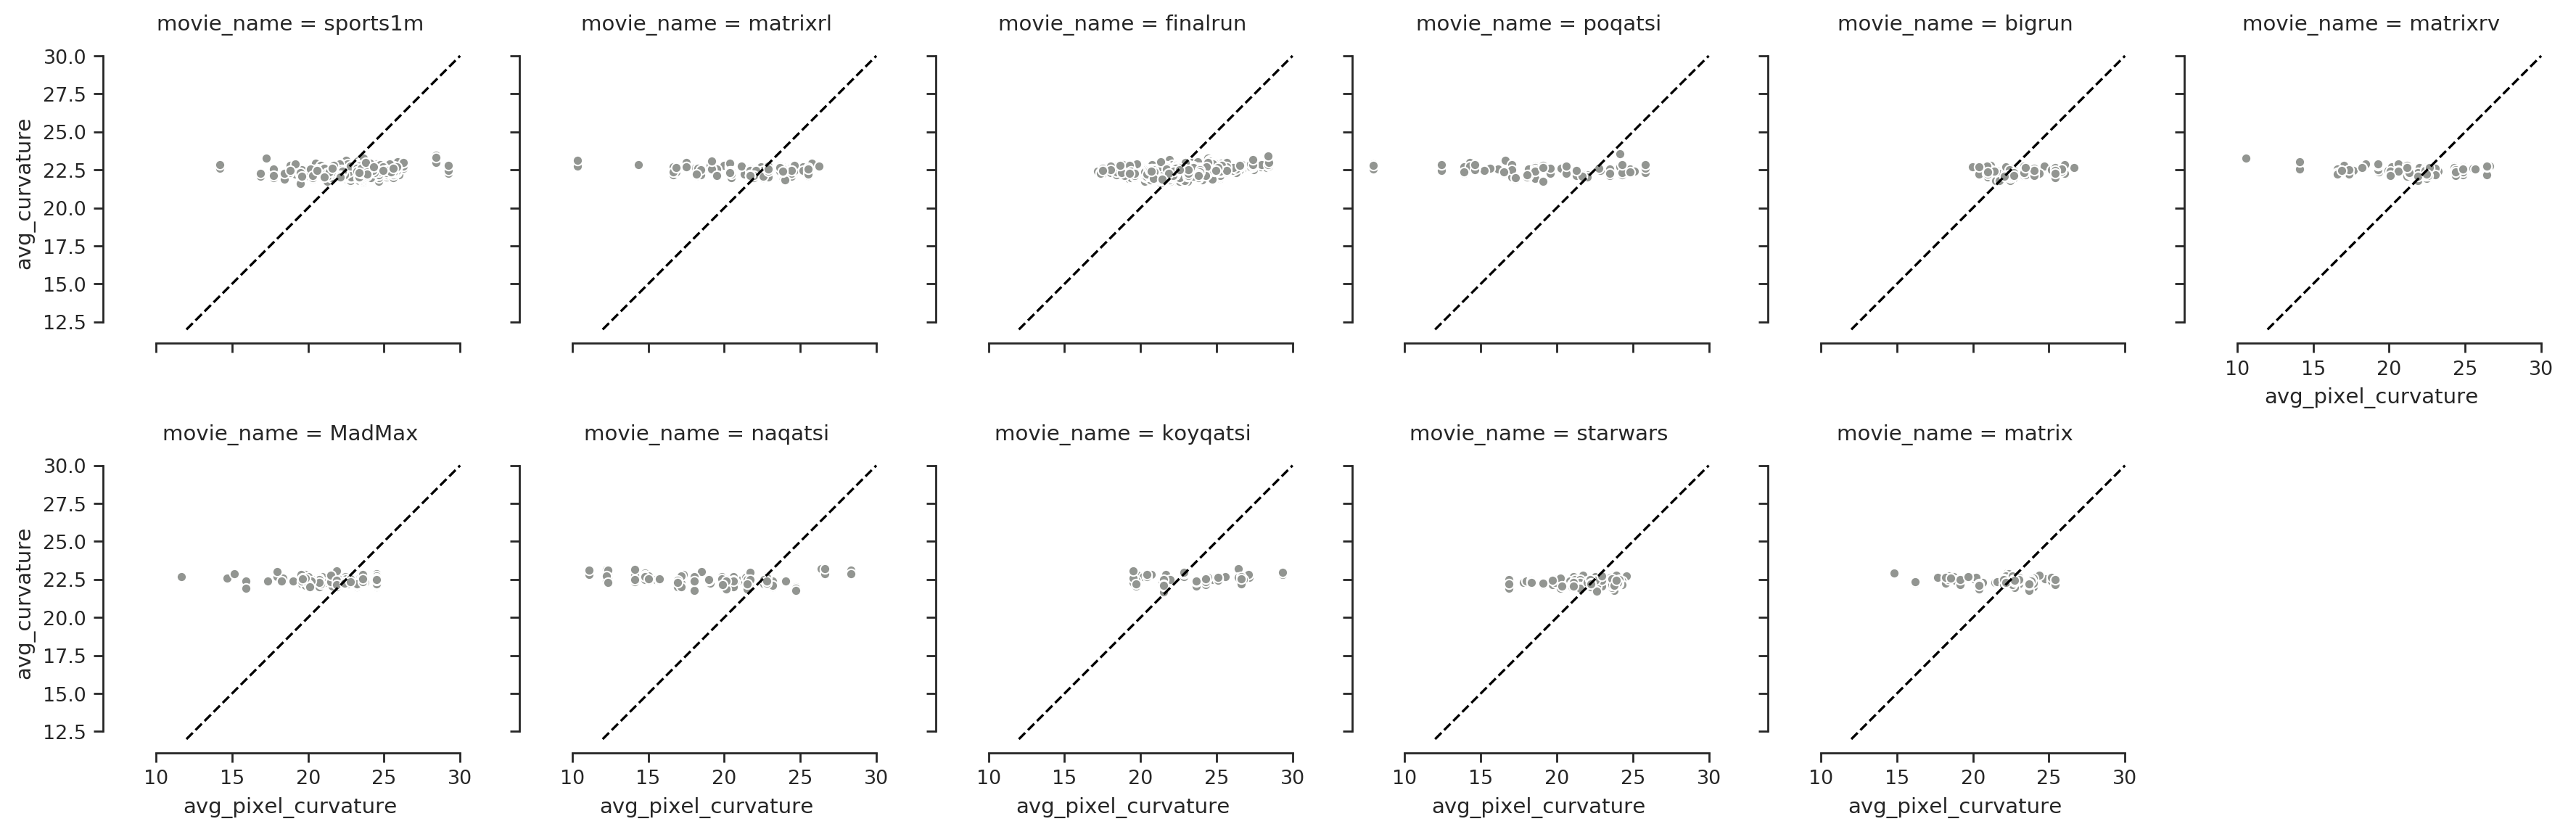

In [12]:

sns.set_context('paper', font_scale=1.1)
sns.set_palette(sns.xkcd_palette(['grey', 'golden yellow']))
with sns.axes_style("ticks"):
    g = sns.FacetGrid(df_px_resp, col = 'movie_name', aspect=1, col_wrap = 6)
    g.map(sns.scatterplot, 'avg_pixel_curvature', 'avg_curvature')
for ax in g.axes.flatten():
    ax.plot([12, 30], [12, 30], '--k')
    ax.set_aspect('equal')
    #ax.plot([15, 26], [15, 26], '--k')
    
sns.despine(trim=True)
g.fig.set_dpi(200)